IMPORT LIBRARIES

In [1]:
import numpy as np 
from sklearn.preprocessing import StandardScaler
import pandas as pd 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings ('ignore')

# Data collection

In [2]:
# loading the data set
df = pd.read_csv('HR.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# check the n0. of rows and columns in the data set
df.shape

(1470, 35)

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# checking for missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Data analysis

In [7]:
# statical measure of data set
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


in above analysis i saw ,some columns has single values so we can drop that columns 

In [8]:
df['EmployeeCount'].nunique()

1

In [9]:
df['Over18'].nunique()

1

In [10]:
df['StandardHours'].nunique()

1

In [11]:
df.drop(['EmployeeCount','Over18','StandardHours'] ,axis=1, inplace=True)

Another column is EmployeeNumber, which contains all different numbers. This can be assumed to be an ID column, which can 
be dropped.

In [12]:
df.drop('EmployeeNumber', axis=1, inplace=True)

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# DATA VISULIZATION

Univariate Analysis

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title=

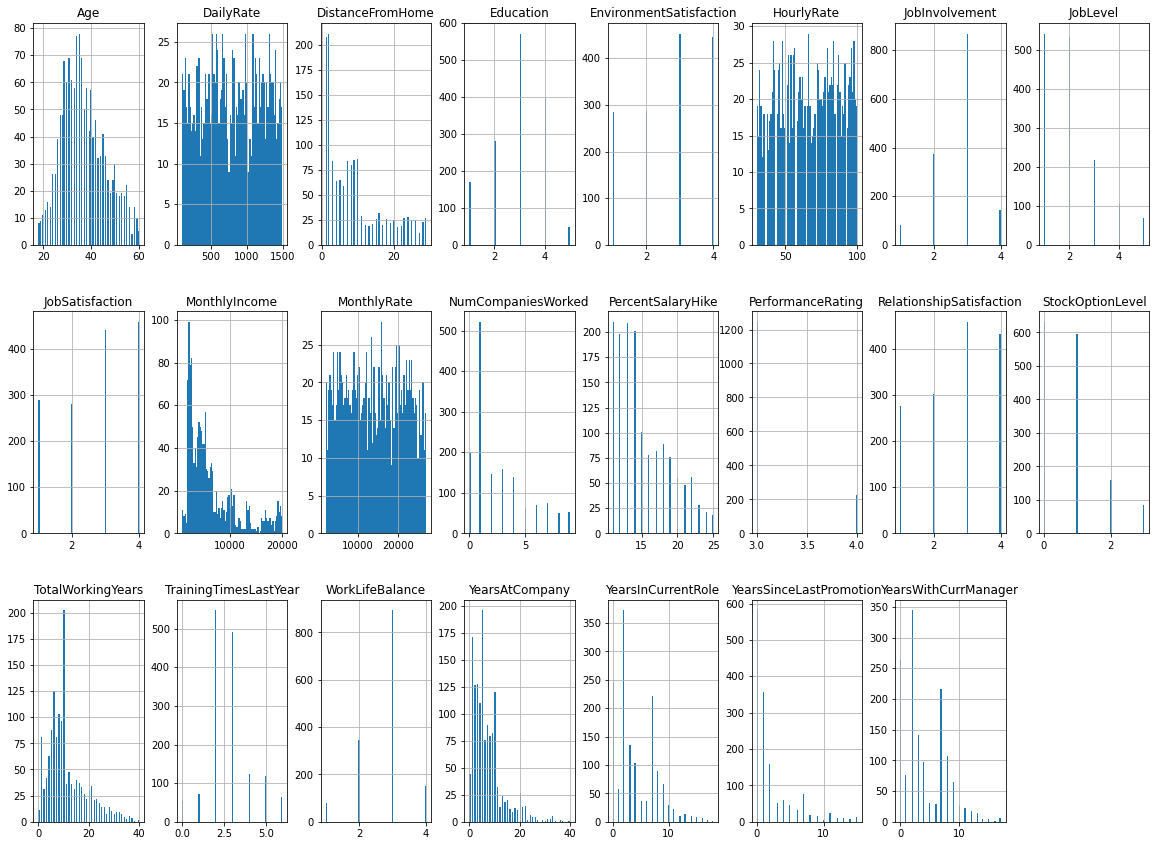

In [14]:
#plotting histogram for uni variate analysis and checking the Normal Distribution
df.hist(figsize= (20, 20), grid=True, layout = (4,8), bins =80)

multivariate analysis

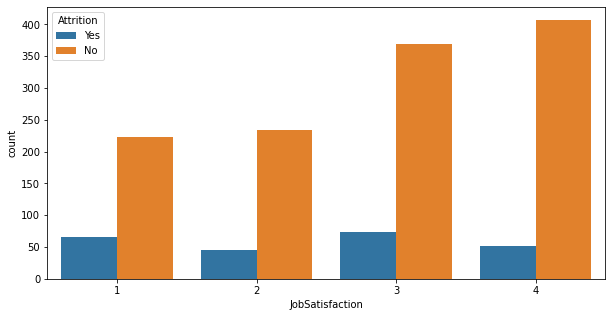

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.show();
#  4- VERY HIGH
#   3- HIGH
#   2- MEDIUM
#   1- LOW

SO WE CAN SEE THAT IS JOB SATISFACTION IS HIGH  ATTRITION IS LOW

What level of education has higher chance to leave the job?

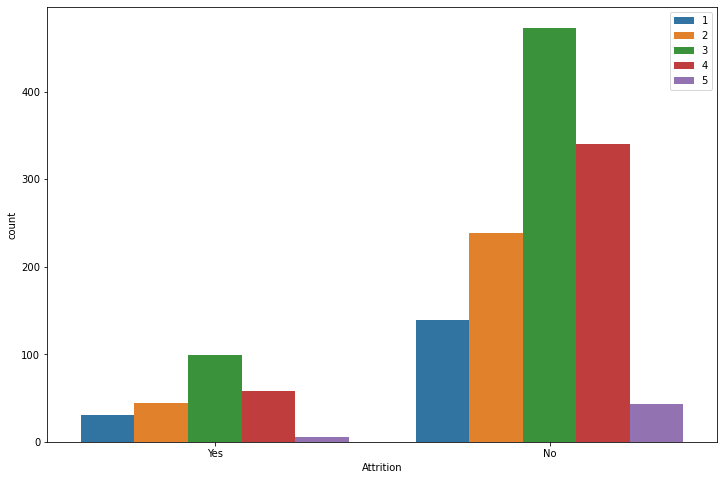

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Attrition', hue='Education', data=df)
plt.legend(loc='best')
plt.show()
# 1-COLLEGE
# 2-BELOW COLLEGE
# 3- MASTER
# 4- BACHLOR
# 5- PHD


Look likes those who are not graduated from university are likely to leave.
Phd employees seem not to look for a new role, this is properly they already have very high rank in the organization.

encode catogorical columns

In [17]:
lab_enc = LabelEncoder()

In [18]:
df2 = lab_enc.fit_transform(df['BusinessTravel'])
df2

array([2, 1, 2, ..., 2, 1, 2])

In [19]:
df['BusinessTravel']=df2


In [20]:
df2 = lab_enc.fit_transform(df['Department'])
df['Department']=df2

In [21]:
df2 = lab_enc.fit_transform(df['EducationField'])
df['EducationField']=df2

In [22]:
df2 = lab_enc.fit_transform(df['Gender'])
df['Gender']=df2

In [23]:
df2 = lab_enc.fit_transform(df['JobRole'])
df['JobRole']=df2

In [24]:
df2 = lab_enc.fit_transform(df['MaritalStatus'])
df['MaritalStatus']=df2

In [25]:
df2 = lab_enc.fit_transform(df['OverTime'])
df['OverTime']=df2

In [26]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,No,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,No,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


now my data looks good and ready to perform other operations

# Model selection/predictions

In [27]:
x=df.drop(columns=['Attrition'])
y=df['Attrition']  

In [28]:
# data scaleing,    formula z=(x-mean)/std
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)# we can use scaler only for features
x_scale

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [29]:
#split data into train and test model and model will be build on trained and tested data
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=.25,random_state=348)
#by default test_size is .25 and we can give any no in random_state.

logistic regression model

In [30]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred = log_reg.predict(x_test)

In [32]:
# check model accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8505434782608695

oh!! my accuracy is good but doesnt mean it is a good model

In [33]:
# confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[289,   8],
       [ 47,  24]], dtype=int64)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.86      0.97      0.91       297
         Yes       0.75      0.34      0.47        71

    accuracy                           0.85       368
   macro avg       0.81      0.66      0.69       368
weighted avg       0.84      0.85      0.83       368



all values seems good but i will perofom it on other algprithms

decision tree classifier

In [35]:
dtr=DecisionTreeClassifier()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [36]:
# check model accuracy
accuracy = accuracy_score(y_test,pred)
accuracy

0.7853260869565217

In [37]:
# confusion matrix
conf_mat=confusion_matrix(y_test,pred)
conf_mat

array([[258,  39],
       [ 40,  31]], dtype=int64)

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.87      0.87      0.87       297
         Yes       0.44      0.44      0.44        71

    accuracy                           0.79       368
   macro avg       0.65      0.65      0.65       368
weighted avg       0.78      0.79      0.78       368



as we can see that decision tree has not good results ,so till noe logistic reggresion is good 
but i will try another algoritm

knn classifier

In [39]:
##Initiate KNeighbors Classifier
knn=KNeighborsClassifier()
#model training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
predt=dtr.predict(x_test)

In [41]:
# check model accuracy
accuracy = accuracy_score(y_test,predt)
accuracy

0.7853260869565217

In [42]:
# confusion matrix
conf_mat=confusion_matrix(y_test,predt)
conf_mat

array([[258,  39],
       [ 40,  31]], dtype=int64)

In [43]:
print(classification_report(y_test,predt))

              precision    recall  f1-score   support

          No       0.87      0.87      0.87       297
         Yes       0.44      0.44      0.44        71

    accuracy                           0.79       368
   macro avg       0.65      0.65      0.65       368
weighted avg       0.78      0.79      0.78       368



# so, all of three algo, only logistic regression gave satisfactory result so i am using logistiregression.

In [44]:
# save the model
# now save the model 
pickle.dump(log_reg,open('cl_hranalytic','wb'))# cl_hranalytic model is the new name of file and wb is for write

# NOW MY MODEL IS READY TO PRFORM TASKS.¶
